# Introduction

Customer Behavior Analysis is a process that involves examining and understanding how customers interact with a business, product, or service. This analysis helps organizations make informed decisions, tailor their strategies, and enhance customer experiences.

So, the process starts with collecting data based on customer behaviour on a platform.

We will start by importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importing

Next we'll import the data and have a look at the first 5 rows.

In [3]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\ecommerce_customer_data.csv')

In [4]:
df.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


We will obtain all the info of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


# Descriptive Statistics

Descriptive statistics help us understand the center and spread of data, using measures like mean, median, mode, variance, and standard deviation.

Let's obtain the descriptive statistics of the data.

In [20]:
df.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


In [21]:
df.describe(include='object')

,Gender,Location,Device_Type
count,500,500,500
unique,2,8,3
top,Male,Kolkata,Mobile
freq,261,71,178


# Uni-Variate Analysis

Now, let’s have a look at the distribution of age in the dataset.

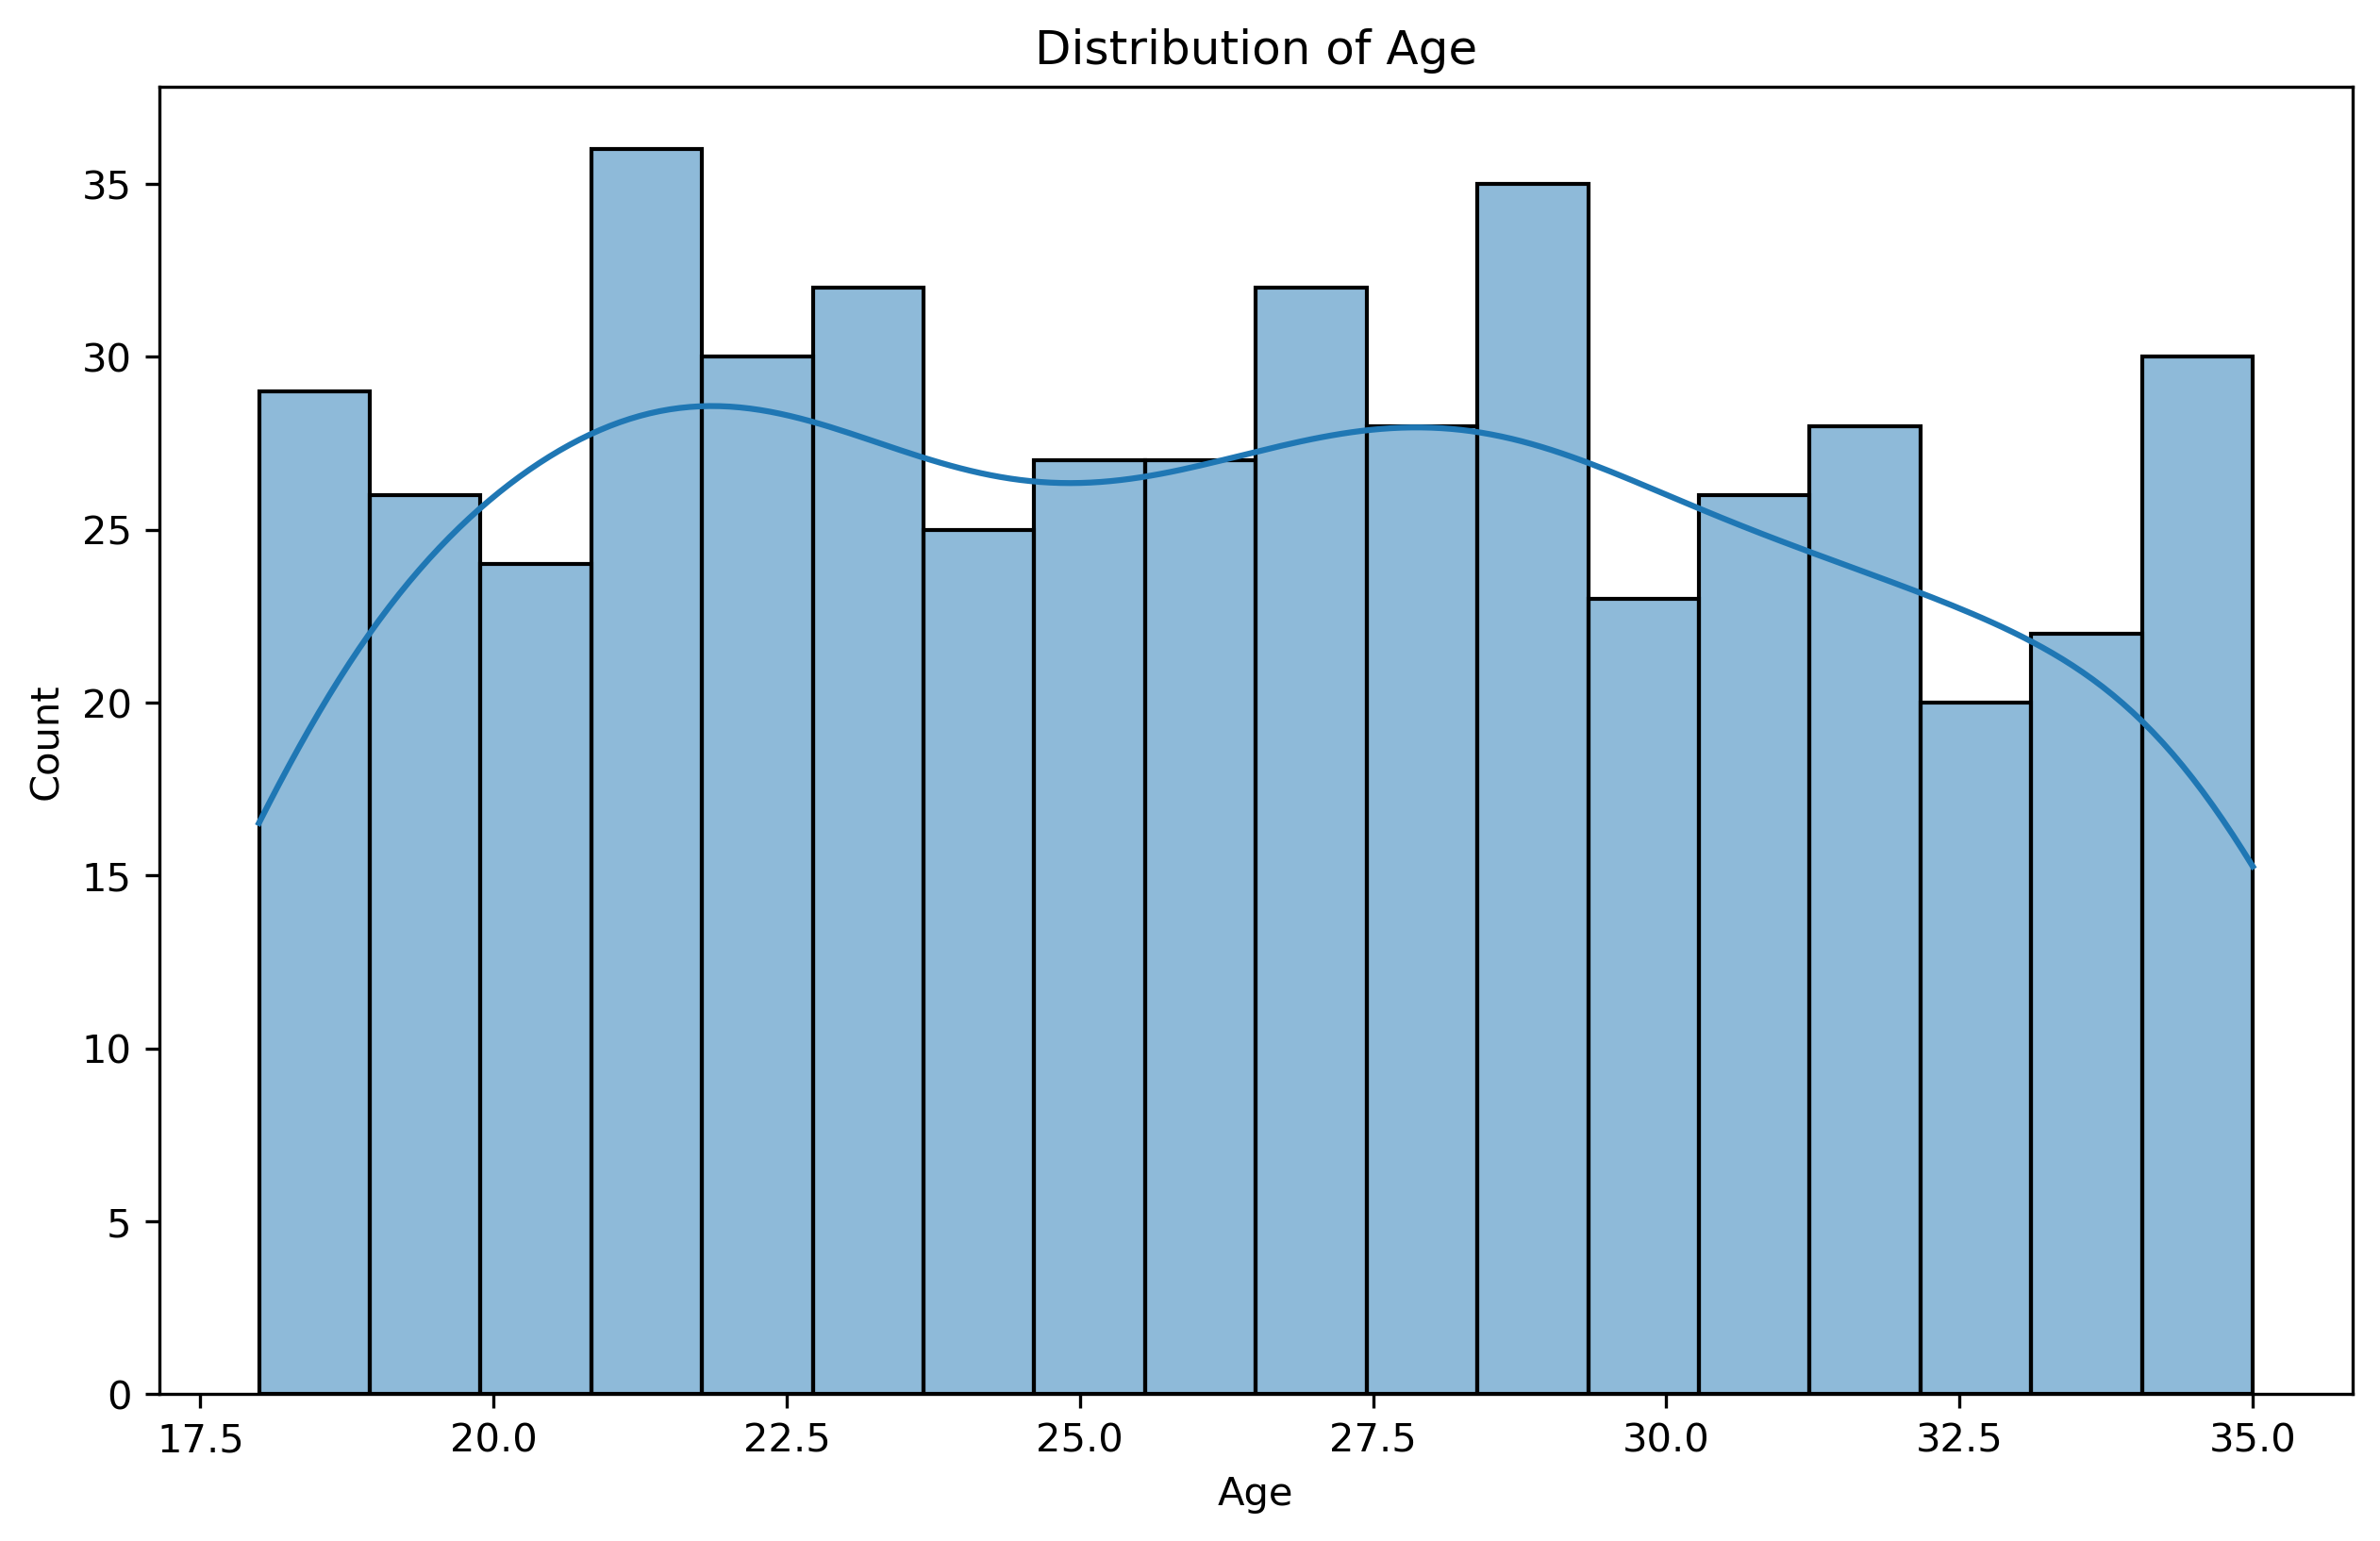

In [19]:
plt.figure(figsize=(10,6), dpi=300)

sns.histplot(data=df, x='Age', kde=True, bins= 18)

plt.title('Distribution of Age')

plt.show()

In [18]:
sorted(df['Age'].unique())

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

Based on the distribution above, we can see that there are customers of various ages indicating the engagement of different age groups for different items available in the website.

Now, let’s have a look at the gender distribution.

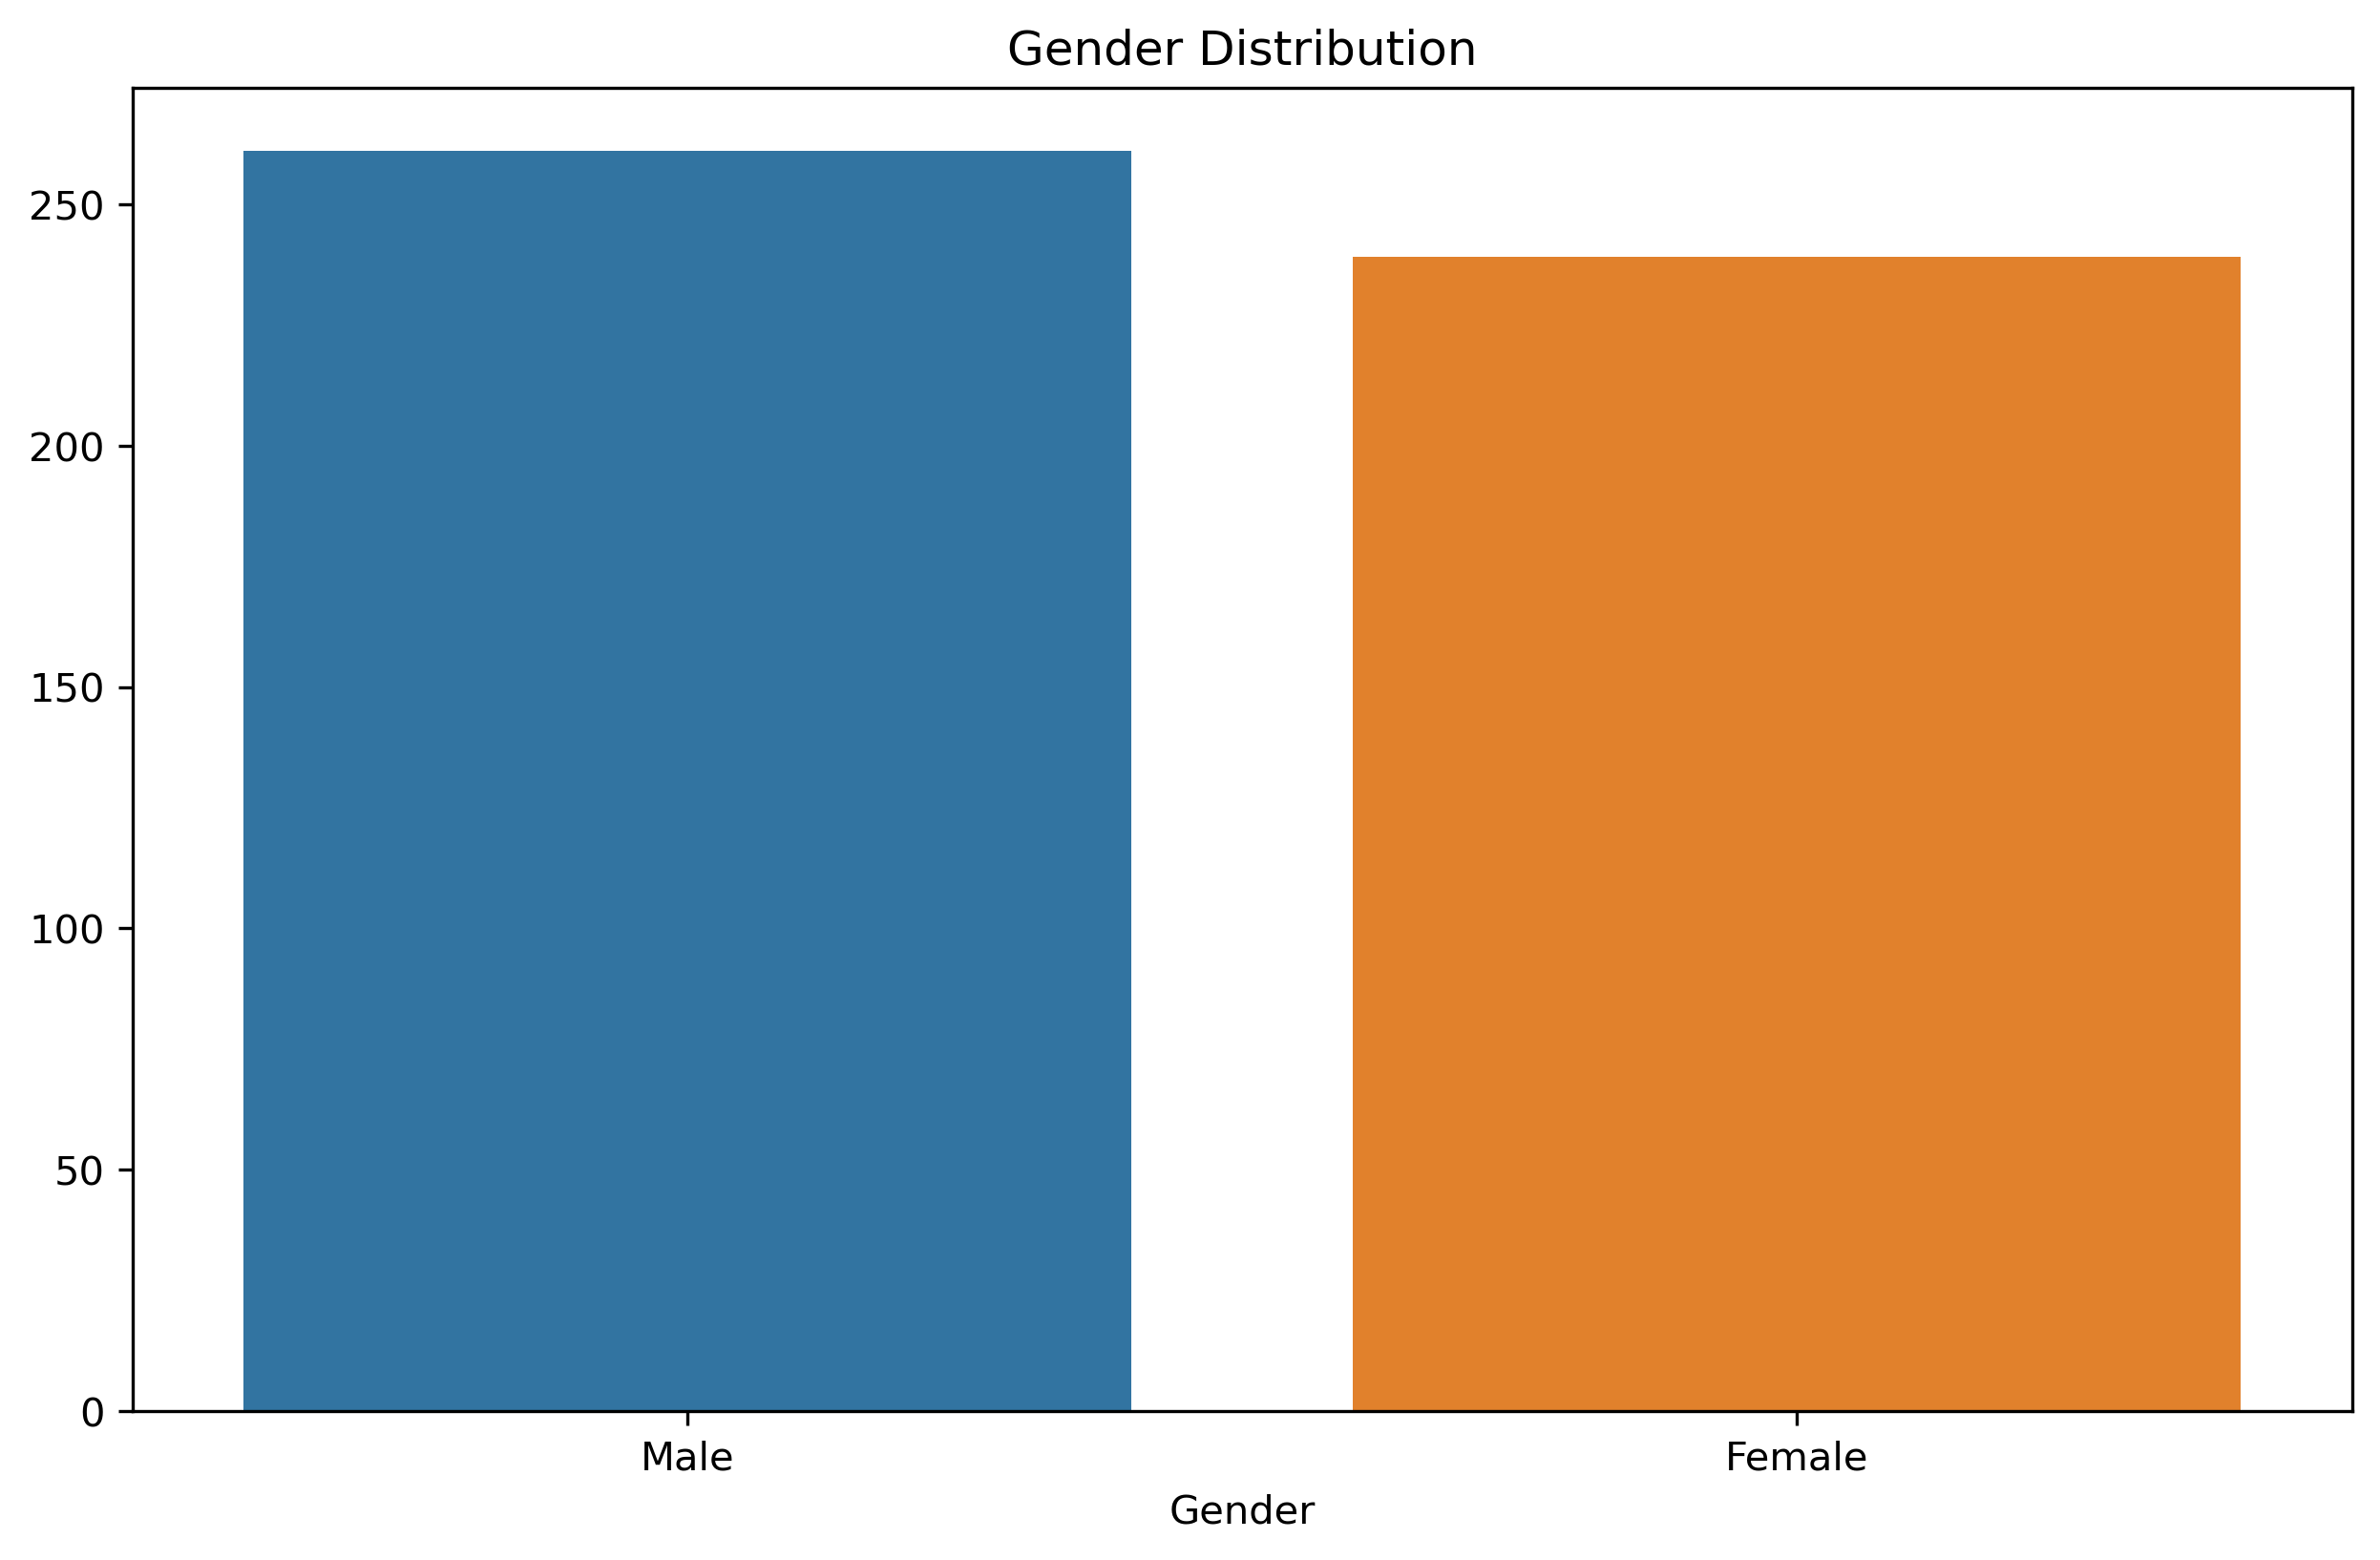

In [110]:
plt.figure(figsize=(10,6), dpi=300)

gender_data = df['Gender'].value_counts()

sns.barplot(x=gender_data.index, y=gender_data.values)

plt.title('Gender Distribution')

plt.show()

In [111]:
gender_data = df['Gender'].value_counts()

In [114]:
gender_data

Gender
Male      261
Female    239
Name: count, dtype: int64

It's clear that there are more male customers for this website.

Now, let’s have a look at the average total pages viewed by gender.

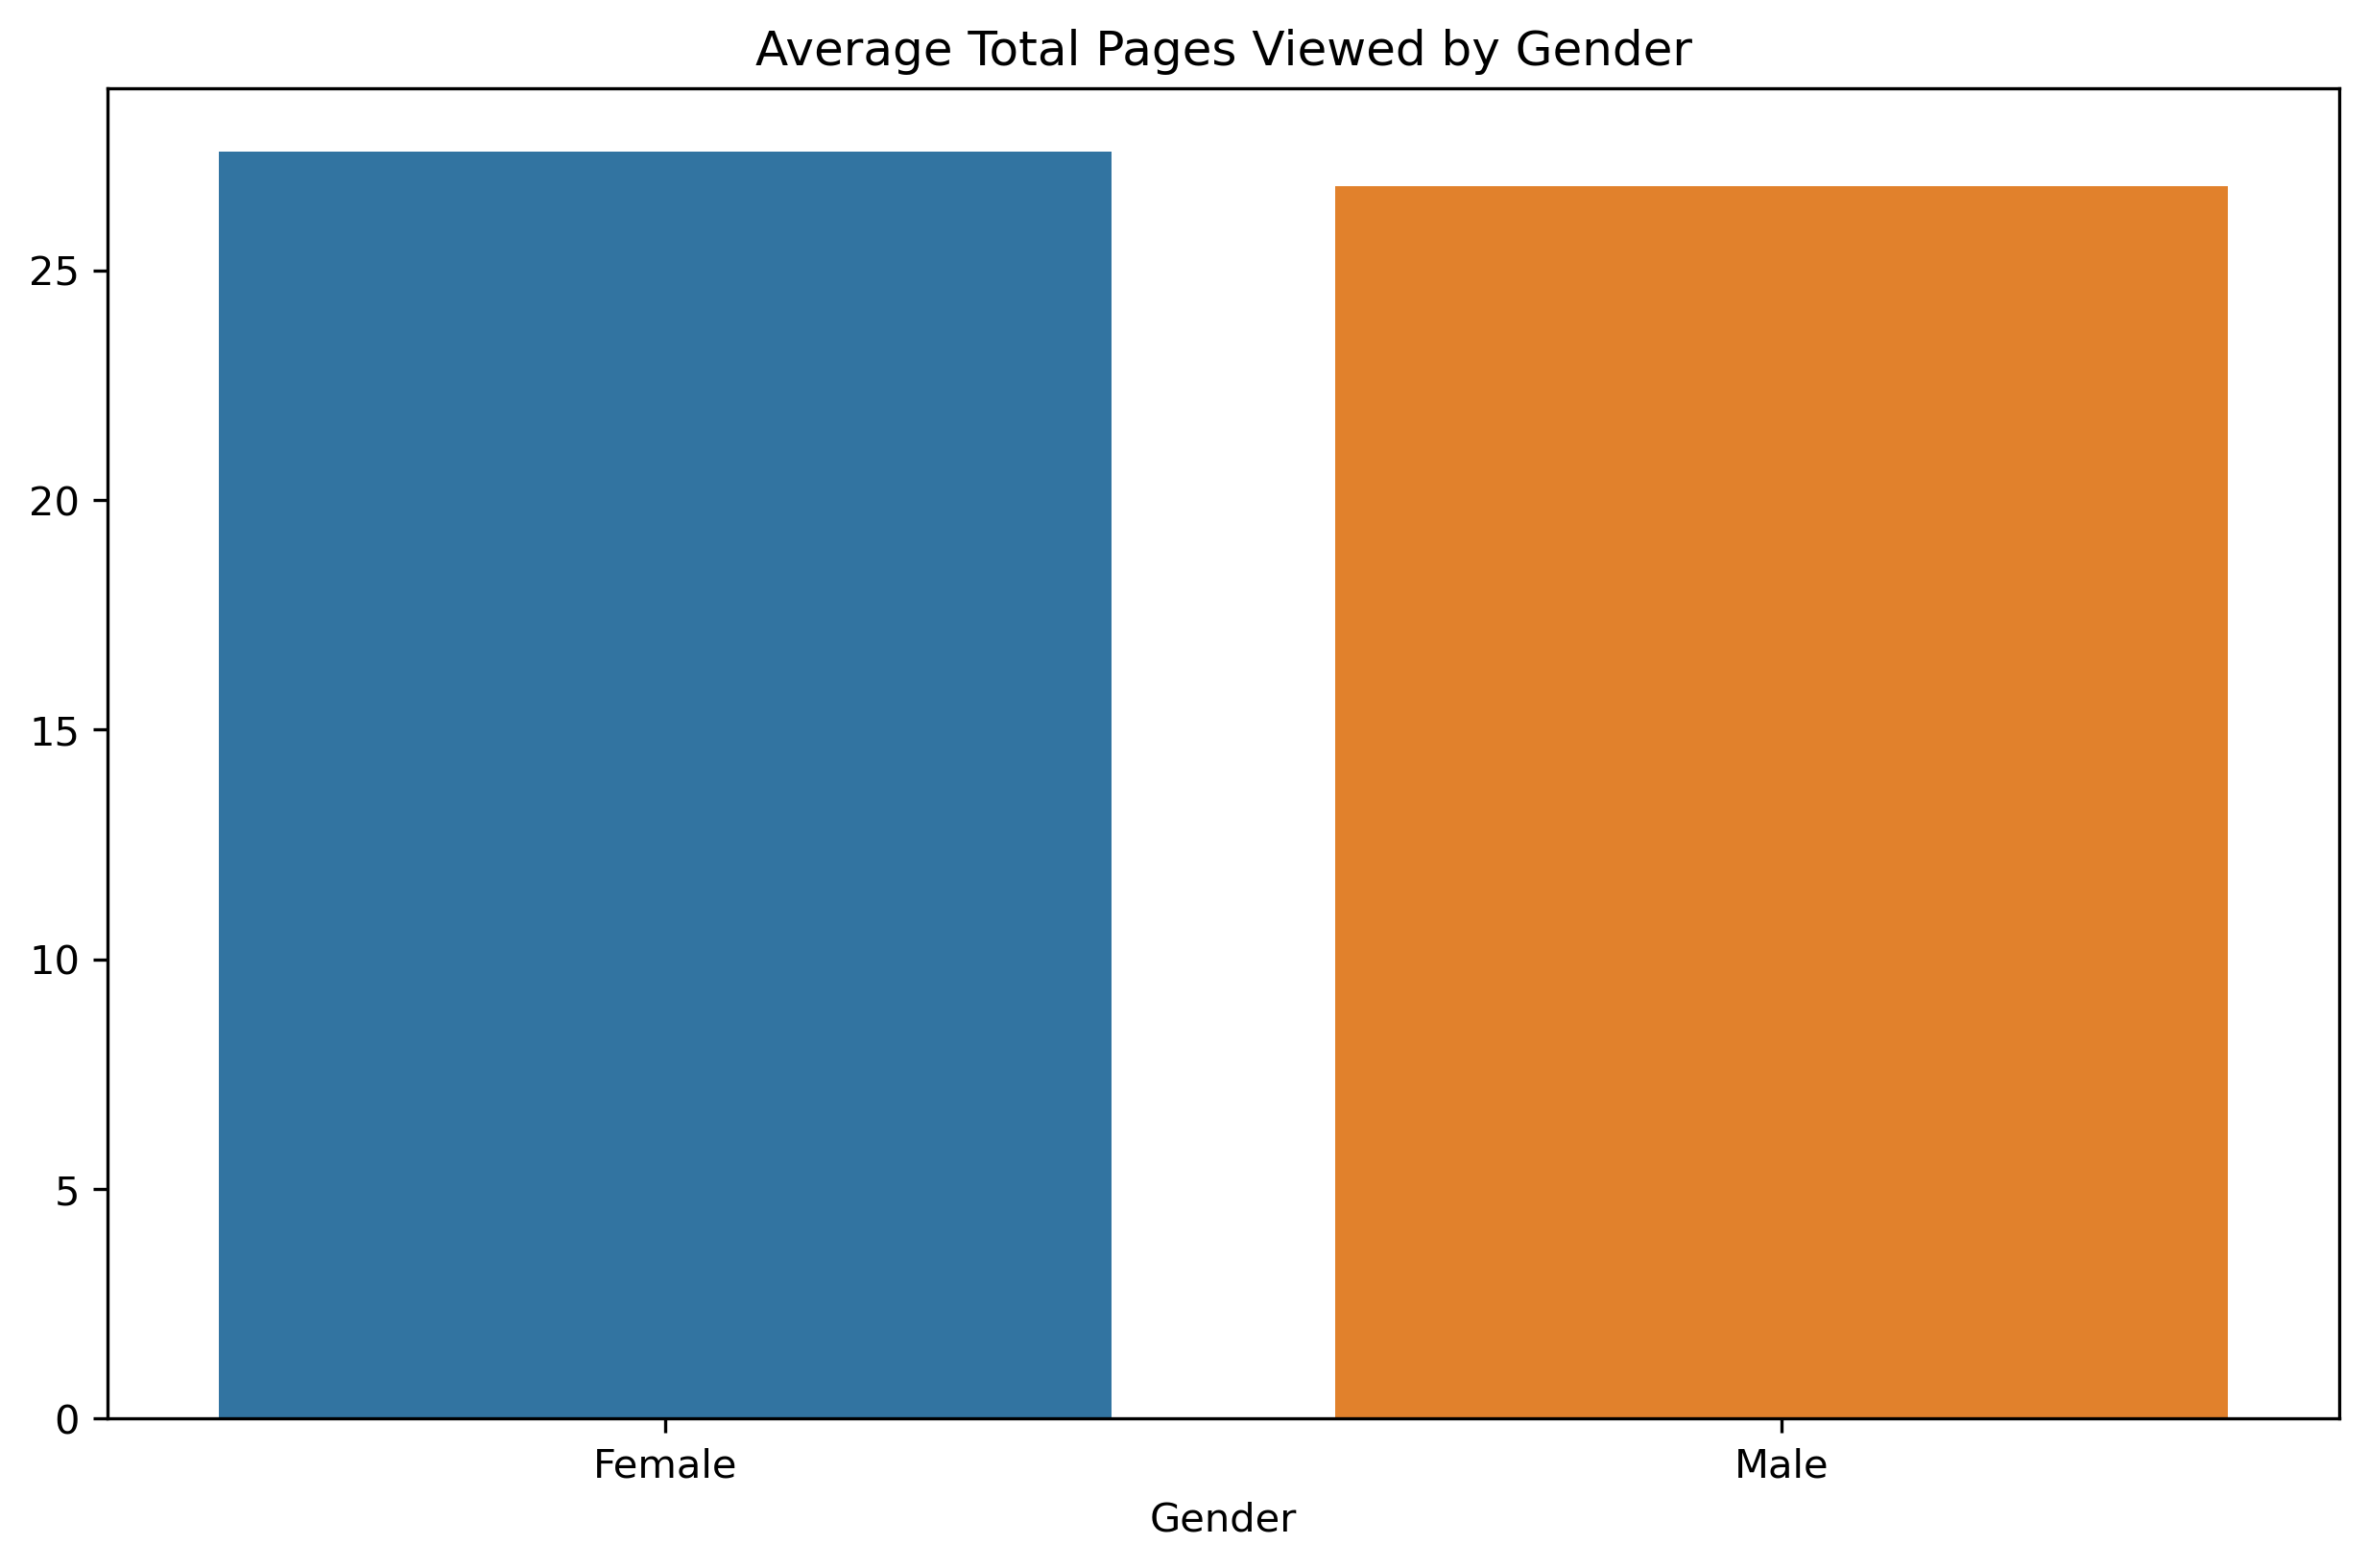

In [53]:
plt.figure(figsize=(10,6), dpi=300)

gender_grouped = df.groupby('Gender')['Total_Pages_Viewed'].mean()

sns.barplot(x=gender_grouped.index, y=gender_grouped.values)

plt.title('Average Total Pages Viewed by Gender')

plt.show()

It's clear that the female customers spend a bit more time browsing this website than male customers.

Now, let’s have a look at the average total pages viewed by devices.

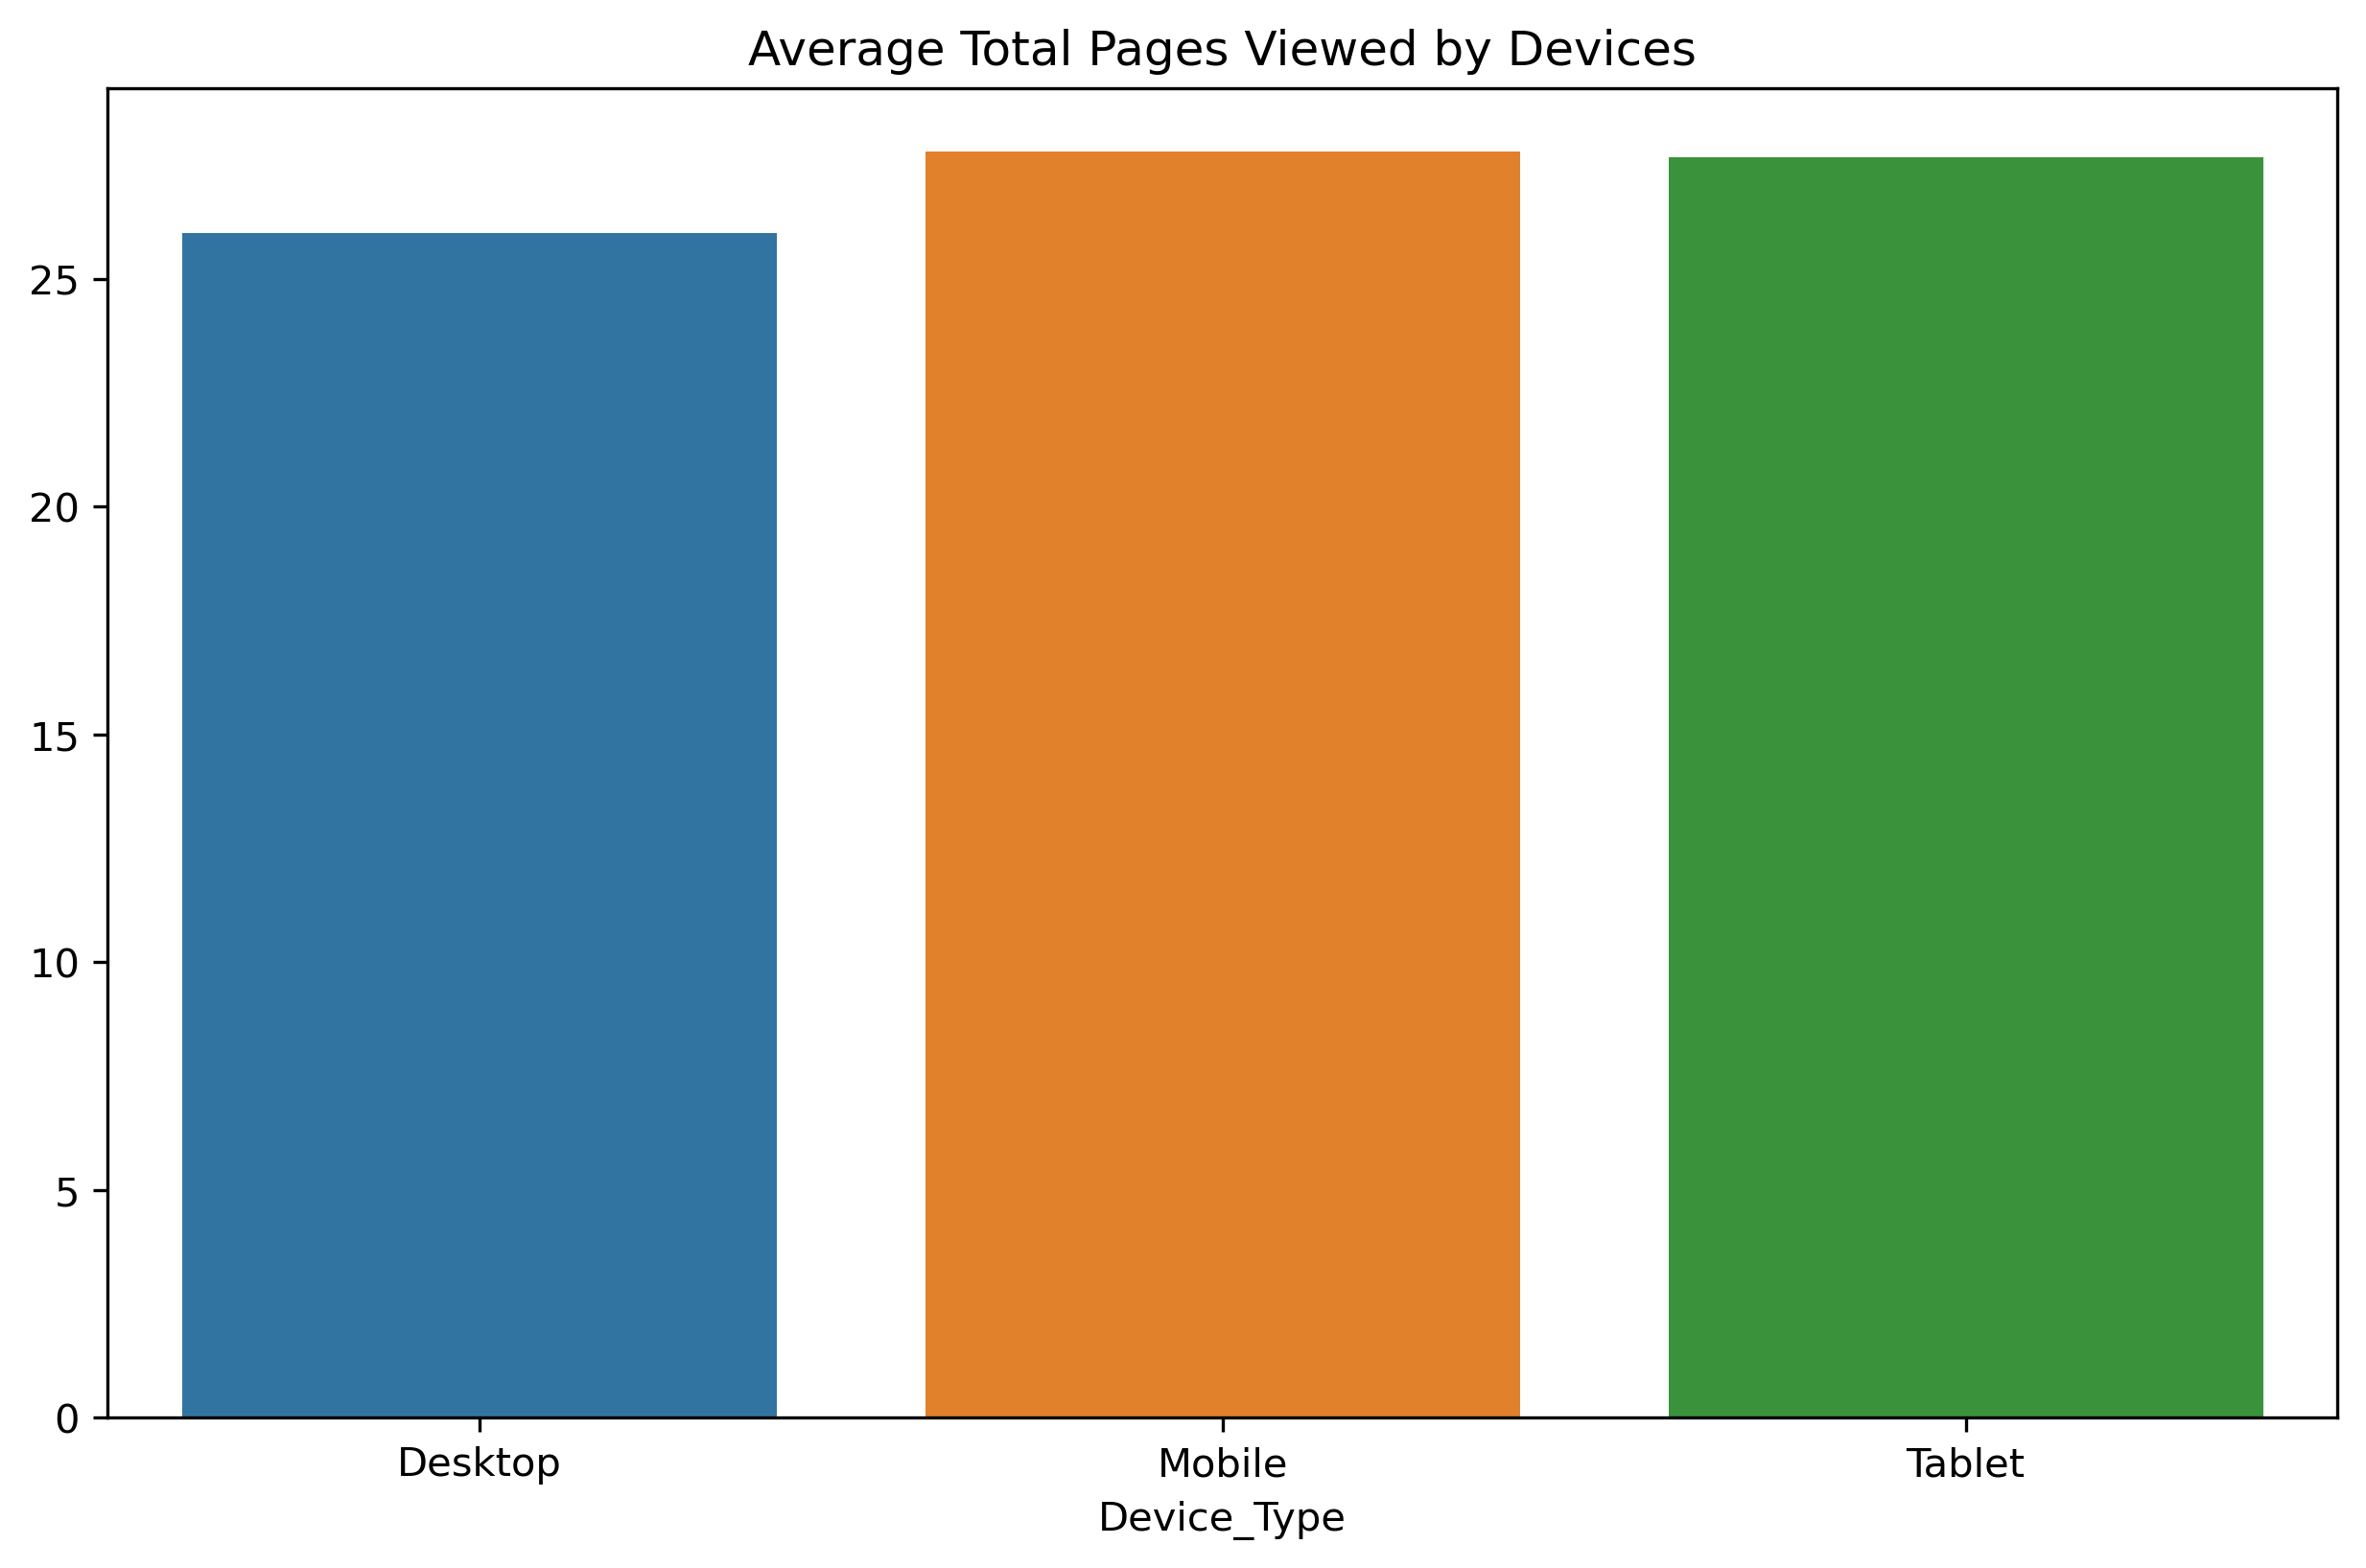

In [54]:
plt.figure(figsize=(10,6), dpi=300)

devices_grouped = df.groupby('Device_Type')['Total_Pages_Viewed'].mean()

sns.barplot(x=devices_grouped.index, y=devices_grouped.values)

plt.title('Average Total Pages Viewed by Devices')

plt.show()

It's clear that the mobiles are preferred device for most of the customers to view the website.

Customer Lifetime Value is the value acquired by the customer, with the total items they purchased and the no. of pages they viewed throughout their life.

Now, let’s calculate the customer lifetime value and visualize segments based on the customer lifetime value.

In [56]:
df['CLV'] = (df['Total_Purchases'] * df['Total_Pages_Viewed']) / df['Age']

In [92]:
df.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases,CLV,Segment
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0,0.000000,NaN
1,2,Male,25,Kolkata,Tablet,30,38,9,4,6.080000,High Value
2,3,Male,32,Bangalore,Desktop,37,13,5,0,0.000000,NaN
3,4,Male,35,Delhi,Mobile,7,20,10,3,1.714286,Low Value
4,5,Male,27,Bangalore,Tablet,35,20,8,2,1.481481,Low Value


In [116]:
df['CLV'].min()

0.0

Now based on the CLV, we will segregate the customers into different segments.

In [91]:
bins = [1, 2.5, 5, float('inf')]

labels = ['Low Value', 'Medium Value', 'High Value']

df['Segment'] = pd.cut(df['CLV'], bins=bins, labels=labels)

In [94]:
#df.loc[df['CLV'] == 0, 'Segment'] = 'Low Value'

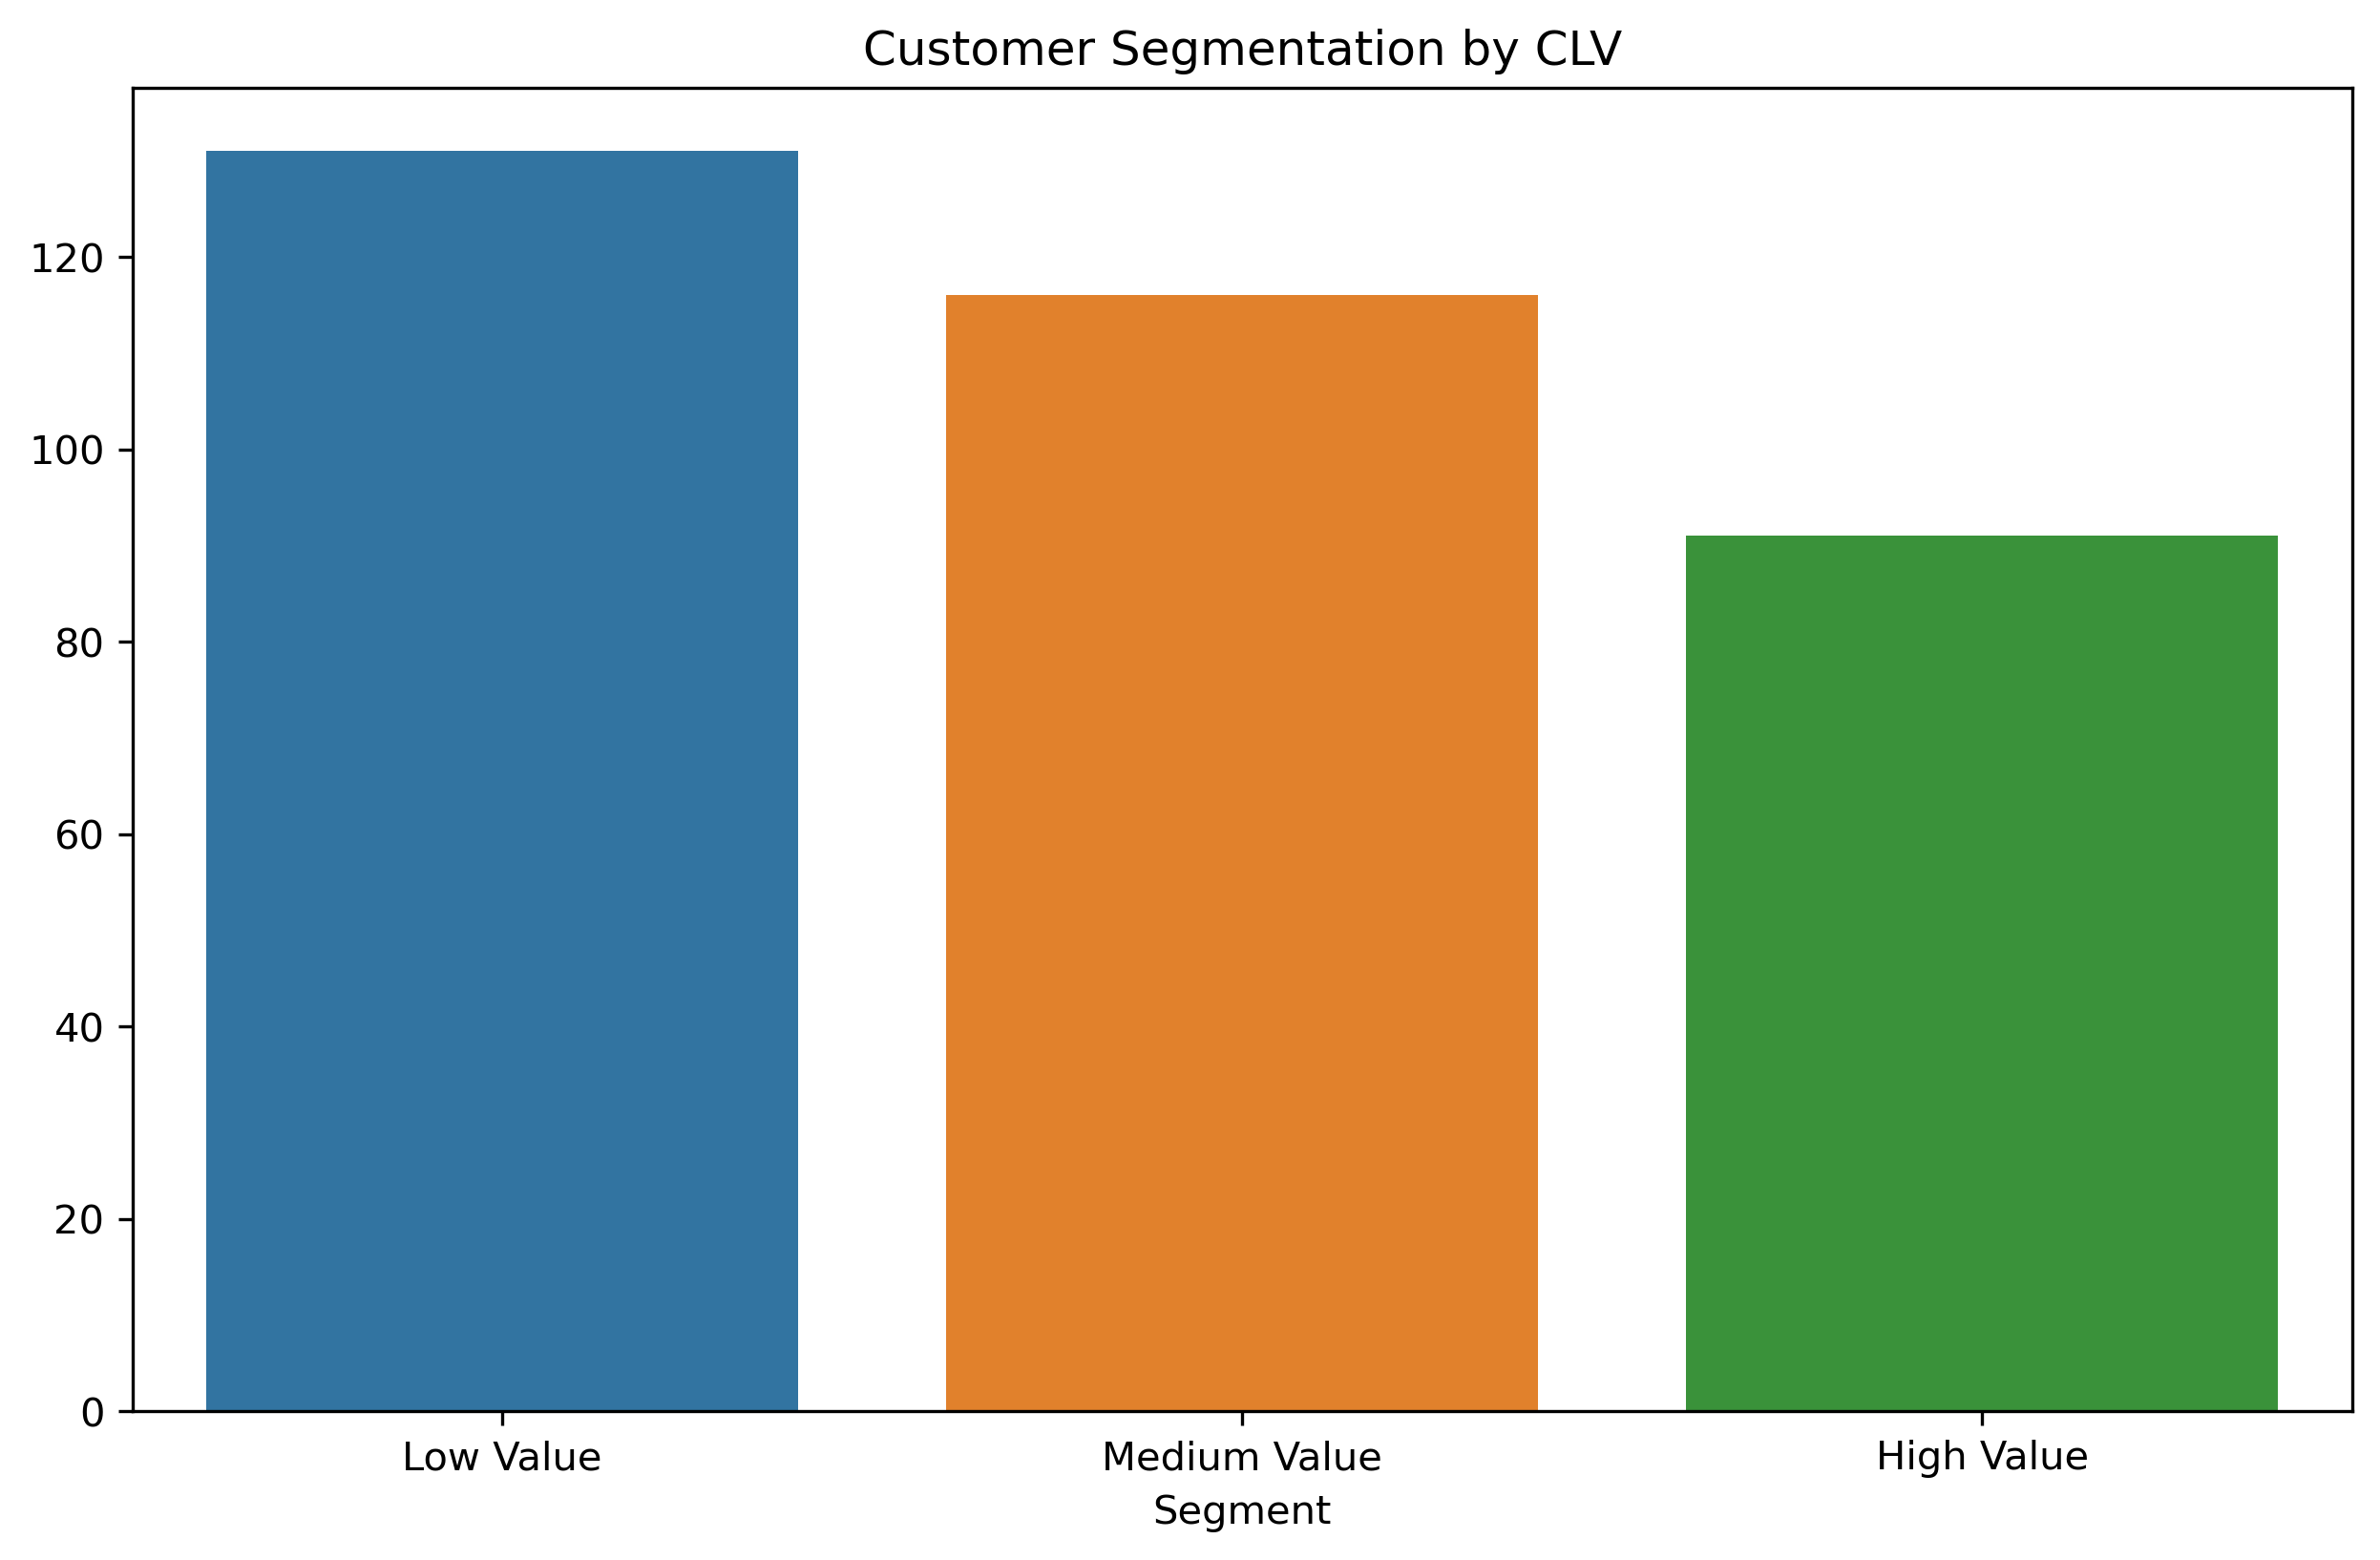

In [93]:
plt.figure(figsize=(10,6), dpi=300)

segment_counts = df['Segment'].value_counts()

sns.barplot(x=segment_counts.index, y=segment_counts.values)

plt.title('Customer Segmentation by CLV')

plt.show()

Now we can see that there are more customers with less CLV.

It can be due to less no. of items or less no. of pages viewed or some of them are new customers or people of younger age.
We can take necessary decisions to impact the customers and increase their CLV accordingly.

# Bi-Variate Analysis

# Analyzing Customer Behaviour

Now, let’s have a look at the relationship between the product browsing time and the total pages viewed.

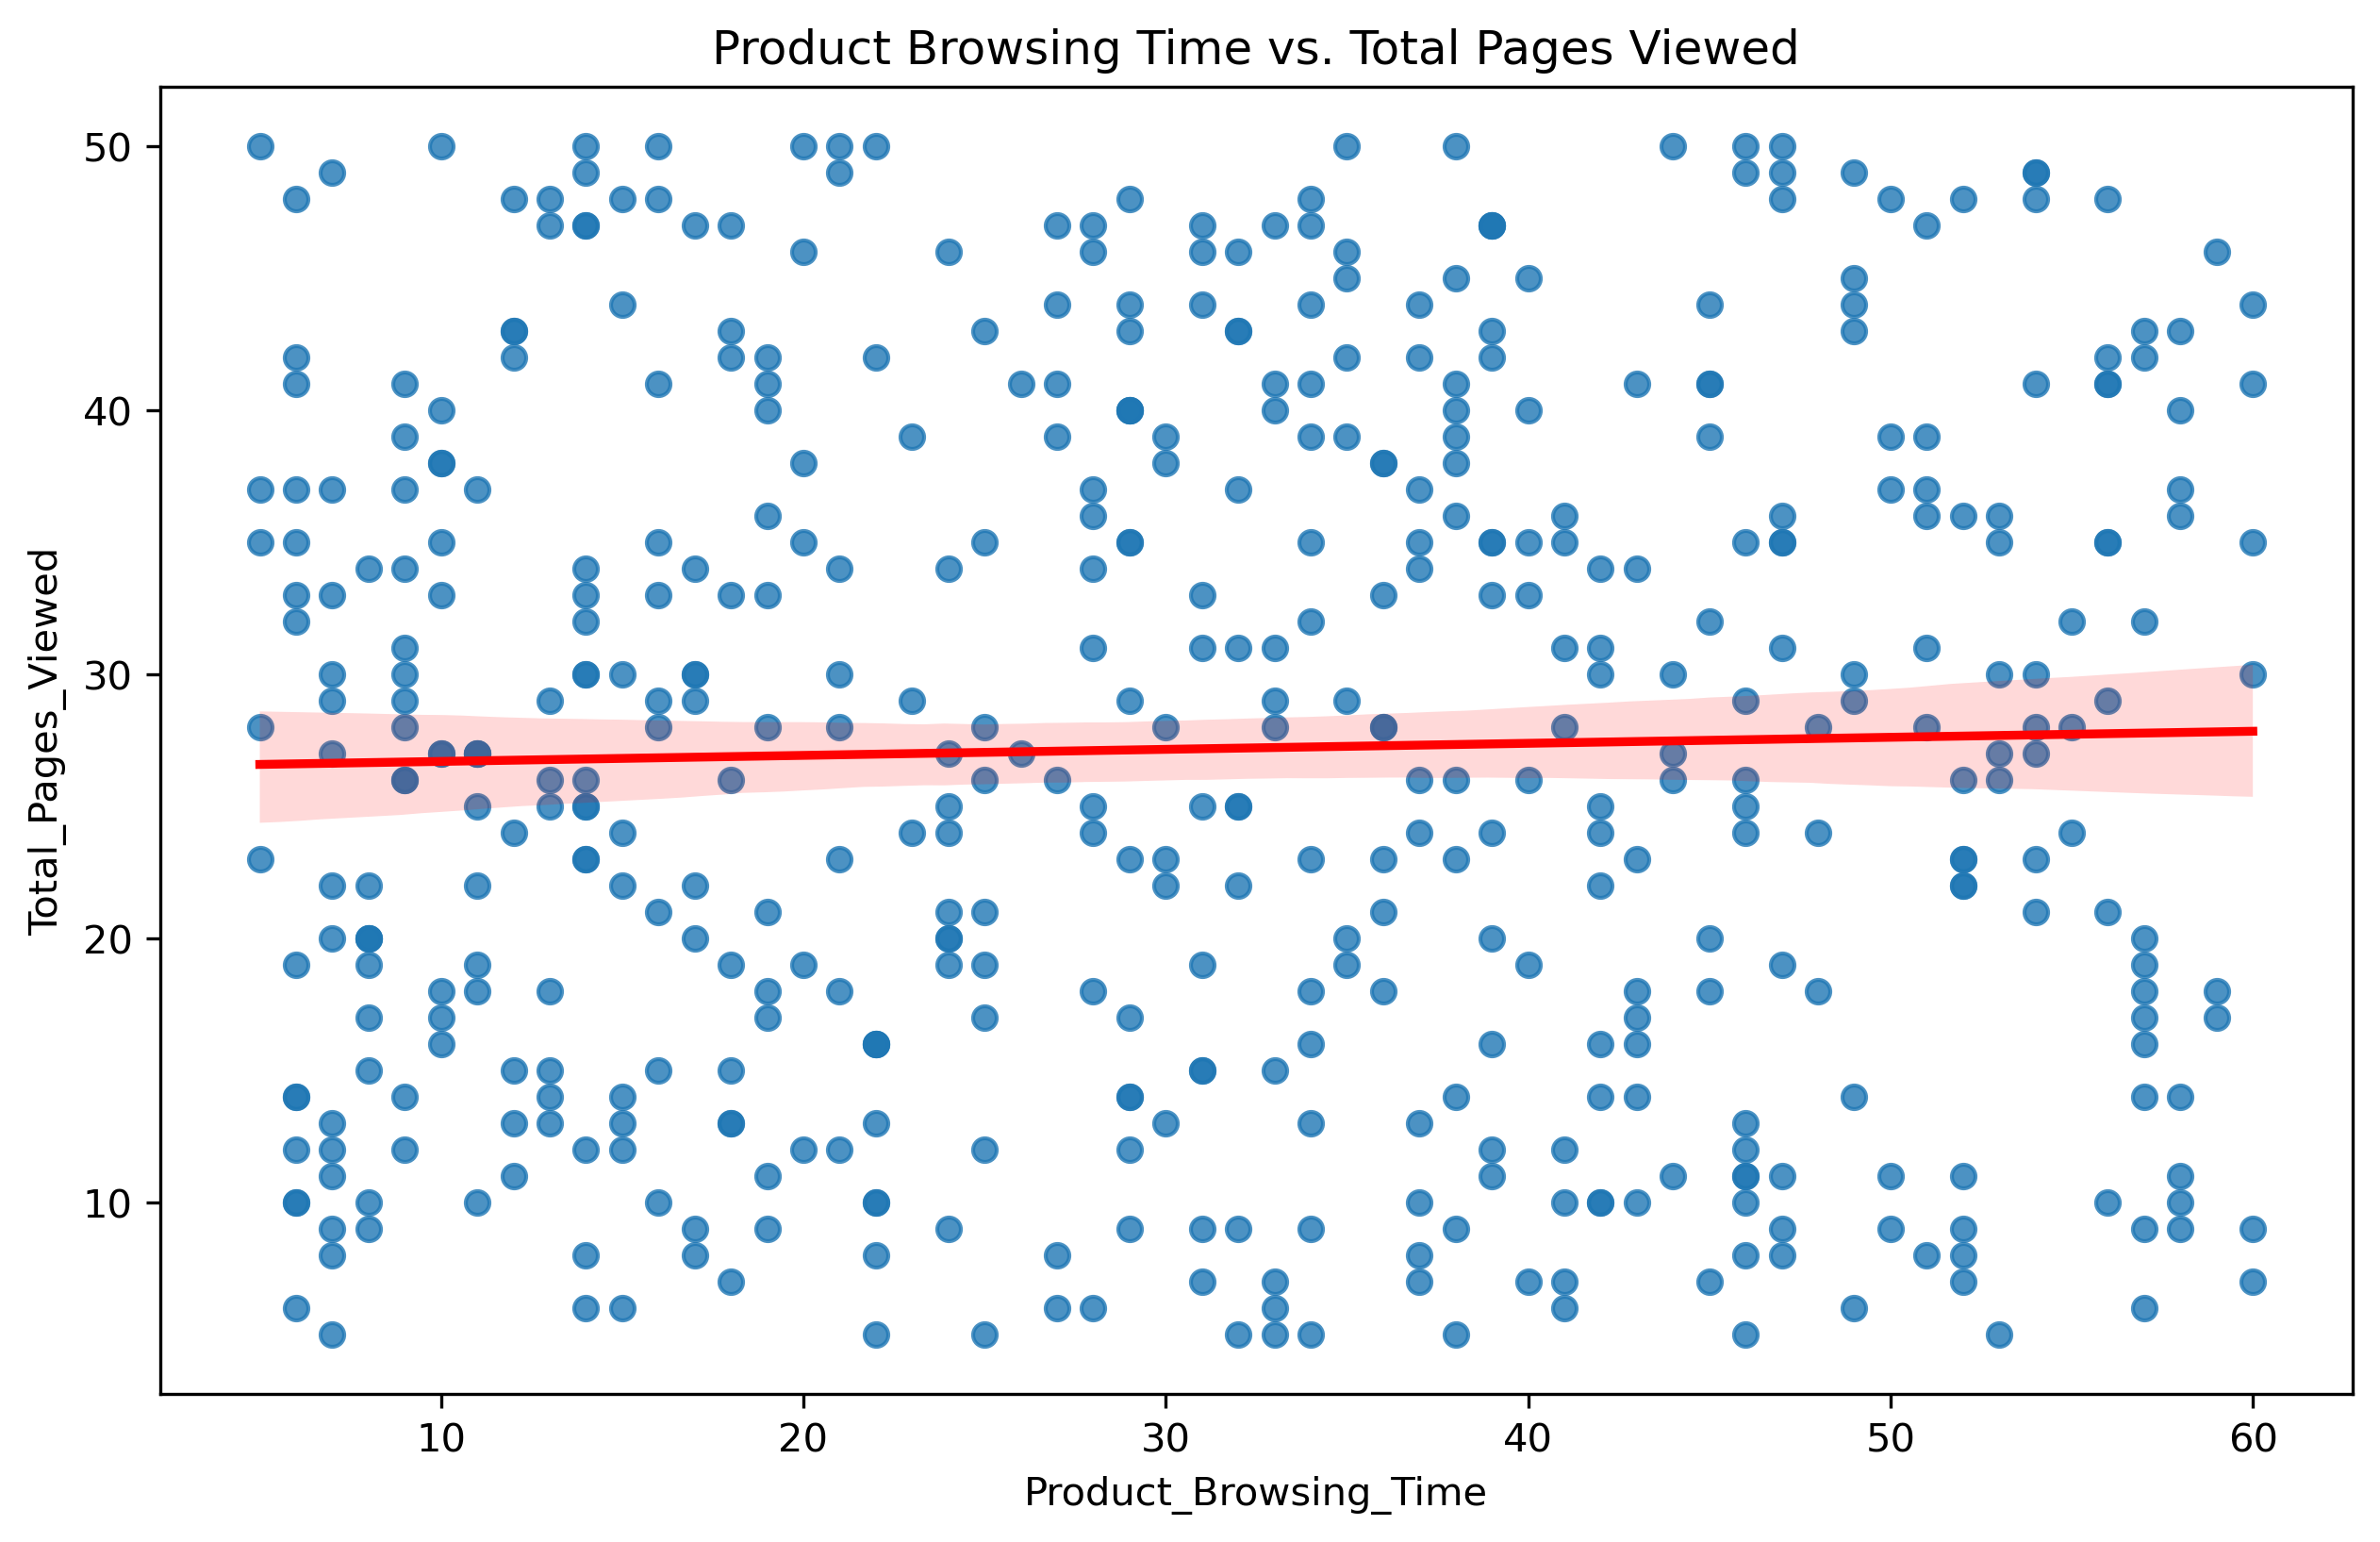

In [41]:
plt.figure(figsize=(10,6), dpi=300)

sns.regplot(data=df, x='Product_Browsing_Time', y='Total_Pages_Viewed', line_kws={'color':'red'})

plt.title('Product Browsing Time vs. Total Pages Viewed')

plt.show()

The above scatter plot shows no consistent pattern or strong association between the time spent browsing products and the total number of pages viewed. It indicates that customers are not necessarily exploring more pages if they spend more time on the website, which might be due to various factors such as the website design, content relevance, or individual user preferences.

# Conversion Funnel

Now, let’s have a look at the conversion funnel of the customers.

In [101]:
funnel_data = df[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum()

funnel_data

Total_Purchases
Product_Browsing_Time Items_Added_to_Cart                 
5                     2                                  3
                      3                                  5
                      6                                  0
                      7                                  1
                      8                                  3
...                                                    ...
60                    1                                  0
                      6                                  0
                      7                                  5
                      8                                 10
                      9                                  4

[342 rows x 1 columns]

In [106]:
import plotly.express as px

fig = px.funnel(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart', title='Conversion Funnel')
fig.show()

In the above graph, the x-axis represents the time customers spend browsing products on the e-commerce platform. The y-axis represents the number of items added to the shopping cart by customers during their browsing sessions.

# Customers Churn Rate

Now, let’s have a look at the churn rate of the customers.

In [108]:
# Calculate churn rate
df['Churned'] = df['Total_Purchases'] == 0

churn_rate = df['Churned'].mean()
print(churn_rate)

0.198


A churn rate of 0.198 indicates that a significant portion of customers has churned, and addressing this churn is important for maintaining business growth and profitability. We can address this by enhancing customer experience, increase customer enagement, product or service improvements and so on.